<a href="https://colab.research.google.com/github/husnulhotimah107/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


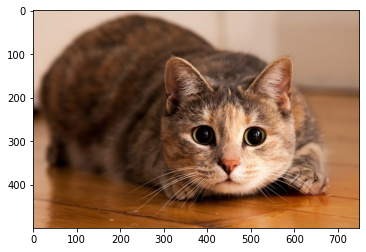

In [4]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/kucing1.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


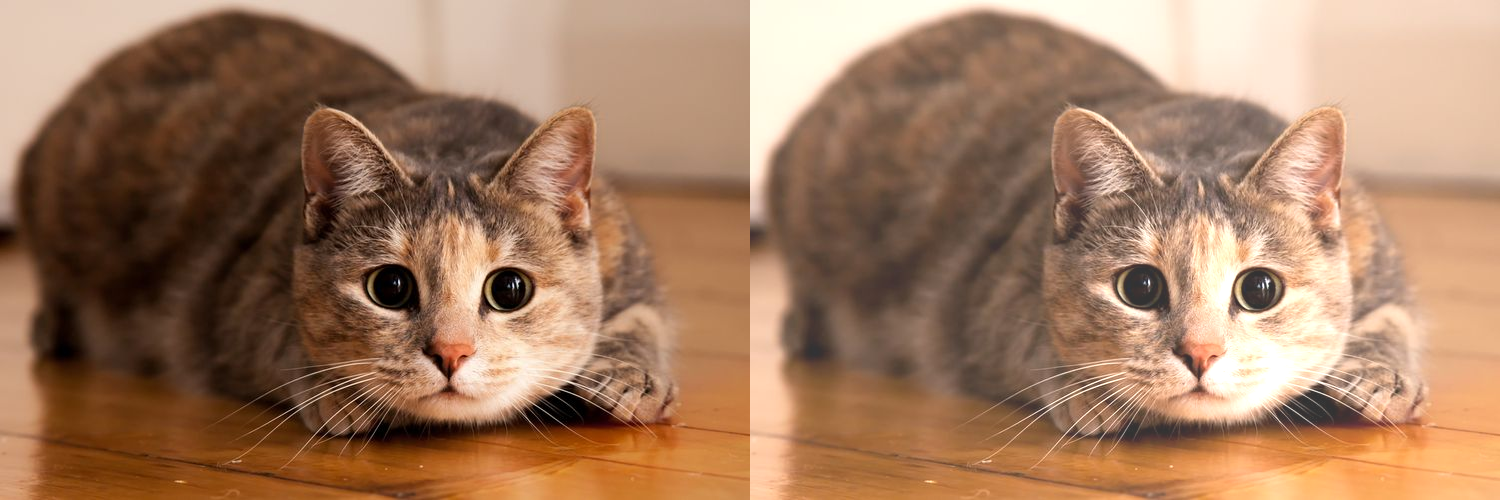

In [6]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/kucing1.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 60
Masukkan kontras [1.0-3.0]: 1.5


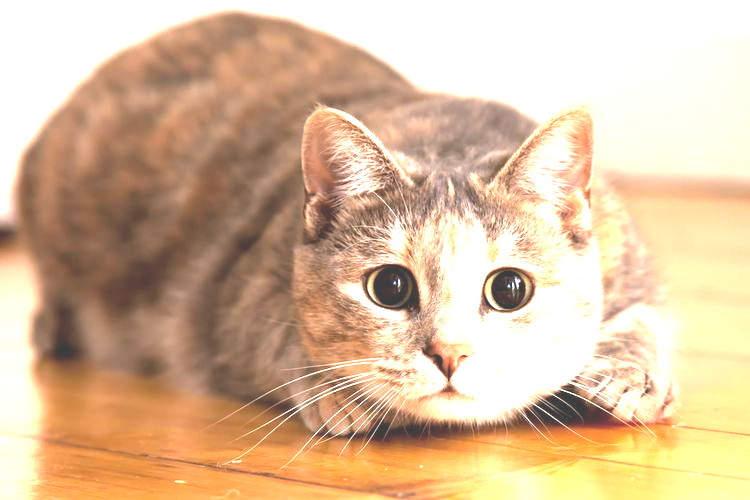

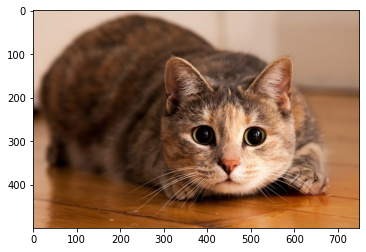

In [11]:
# TUGAS PRAKTIKUM
# 1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan 
#    formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran 
#    seperti berikut:

new_image = np.zeros(image.shape, image.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')


for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(contrast*image[y,x,c] + brightness, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

 mengubah tingkat kecerahan citra dengan transform log 
 -------------------------------- 
Masukan nilai kecerahan: 40


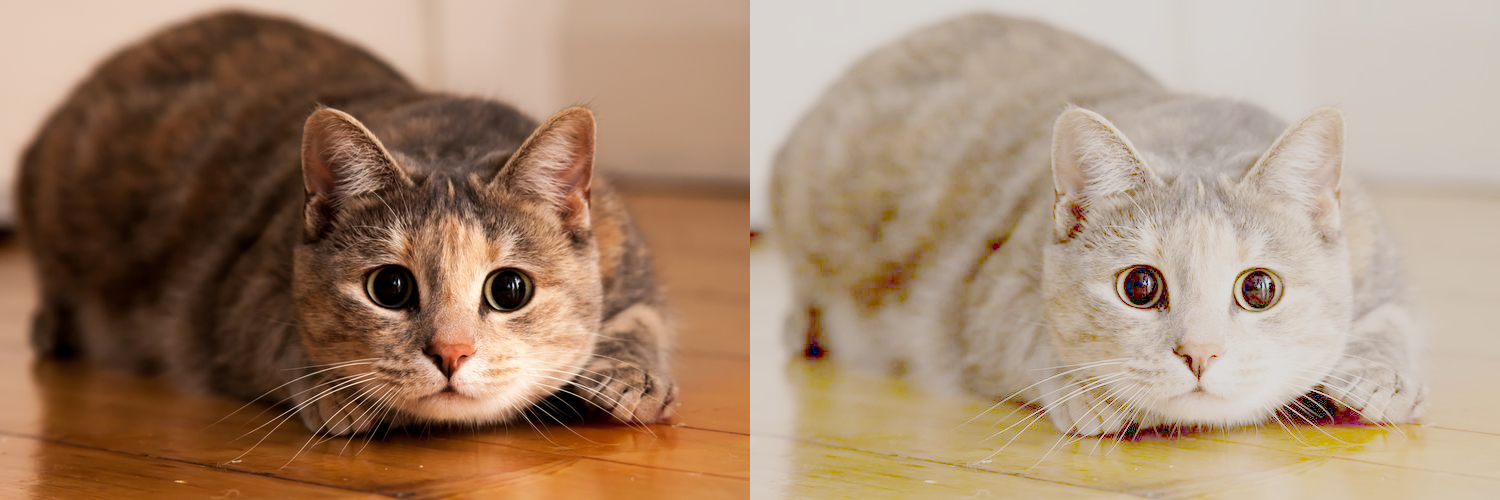

In [15]:
# 2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
#     menggunakan formula yang terdapat pada bagian Ulasan Teori, 
#     sehingga menghasilkan keluaran seperti berikut:
print(' mengubah tingkat kecerahan citra dengan transform log ')
print(' -------------------------------- ')

try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

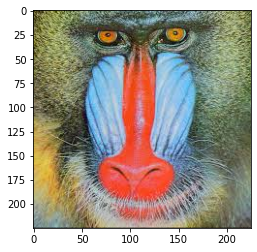

In [16]:
# 3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, 
#    dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada 
#    bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

img_m = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.jpg')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

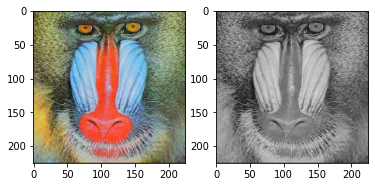

In [17]:
# Nomer 3A
img_avg = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

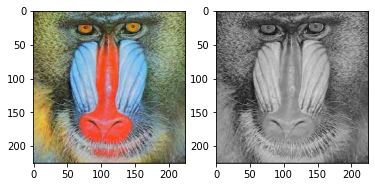

In [18]:
# Nomer 3B
img_light = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.jpg')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

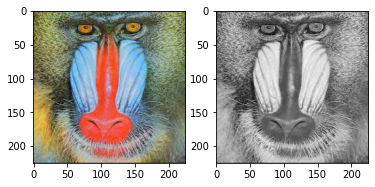

In [19]:
# Nomer 3C
image_lum = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.jpg')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

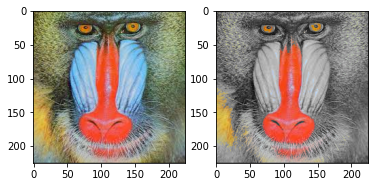

In [20]:
# 4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. 
#    Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak 
#    berwarna merah menjadi grayscale seperti pada contoh berikut:

img_4 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.jpg')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')